In [1]:
import numpy as np
from bitarray.util import int2ba, ba2int

In [2]:
from ga.fabrics import BinaryFabric
from ga.operators import BinaryOperator, TwoPointOperator
from ga.transformers import MultiDimentionTransformer

from ga.evaluators import AverageEvaluator
from ga.selectors import InbreedingSelector, OutbreedingSelector, PanmixiaSelector, SelectiveSelector
from ga.cultivators import RandomCultivator, TotalEliteCultivator, ExpulsionCultivator
from ga.algorithms import SimpleGA

from helpers.plotting import plotContour, plotScores

$$f \to min $$

In [3]:
# Ackley
# f = lambda x: -20*np.exp(-0.2*np.sqrt(0.5*(x[0]*x[0]+x[1]*x[1]))) \
#                    -np.exp(0.5*(np.cos(2*np.pi*x[0])+np.cos(2*np.pi*x[1]))) \
#                    +20+np.e

# x1_int = [-5, 5]
# x2_int = [-5, 5]

In [4]:
# # Bukin
# f = lambda x: 100*np.sqrt(np.abs(x[1]-0.01*np.power(x[0],2)))+0.01*np.abs(x[0]+10)

# x1_int = [-15, -5]
# x2_int = [-3, 3]

In [5]:
# # Holder
f = lambda x: -np.abs(np.sin(x[0])*np.cos(x[1])*np.exp(np.abs(1-(np.sqrt(x[0]*x[0]+x[1]*x[1])/np.pi))))

x1_int = [-10, 10]
x2_int = [-10, 10]

In [6]:
x_ints = [x1_int, x2_int]

In [7]:
h_x1 = 1e-7
h_x2 = 1e-5

n_x1 = len(int2ba(int((x1_int[1] - x1_int[0])/h_x1)))
n_x2 = len(int2ba(int((x2_int[1] - x2_int[0])/h_x2)))

n_xs = [n_x1, n_x2]

n = sum(n_xs)

In [8]:
N = 100
max_iterations = 100
p_mutate = 0.6
epsilon = 1e-9
delta = 1e-9

In [9]:
fabric = BinaryFabric(n)

operator = BinaryOperator(n)
#operator = TwoPointOperator(n)

transformer = MultiDimentionTransformer(n_xs, x_ints)

evaluator = AverageEvaluator(f, transformer)

def distance_e(a, b):
  return np.linalg.norm(np.array(transformer.transform(a)) - np.array(transformer.transform(b)))

def distance_h(a, b):
  dist = 0
  for i, j in zip(a, b):
    if i != j:
      dist += 1
  
  return dist

# selector = InbreedingSelector(distance_e)
selector = OutbreedingSelector(distance_h)
# selector = PanmixiaSelector()
# selector = SelectiveSelector(evaluator)

#cultivator = RandomCultivator(selector, operator, p_mutate)
#cultivator = TotalEliteCultivator(selector, operator, evaluator, p_mutate)
cultivator = ExpulsionCultivator(selector, operator, evaluator, p_mutate)

ga = SimpleGA(fabric, evaluator, transformer, cultivator)

In [10]:
ga.solve(N, max_iterations, epsilon, delta)

0%
10%
20%
30%
40%
50%
60%
70%
80%


([8.055023469235834, 9.664583046237492], -19.208502567396657)

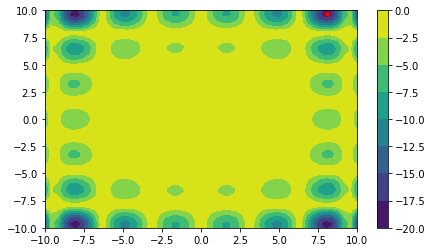

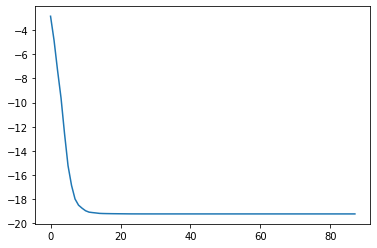

In [11]:
plotContour(lambda x1, x2: f([x1, x2]), x1_int, x2_int, argmin=ga.solution)

plotScores(ga.scores)

In [12]:
#ga.best_from_populations